In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [143]:
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [144]:
df.shape

(200, 5)

In [145]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [146]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [148]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [149]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [150]:
df1=pd.get_dummies(df['Gender'],drop_first=True,dtype=int)
df1

,Male
0,1
1,1
2,0
3,0
4,0
...,...
195,0
196,0
197,1
198,1


In [151]:
dfe=pd.concat((df,df1),axis=1)
dfe

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Male
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1


In [152]:
x=dfe.iloc[:,[2,3,4]]
x

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [153]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    data=KMeans(n_clusters=i,init='k-means++',random_state=42)
    data.fit(x)
    wcss.append(data.inertia_)
wcss


[308812.77999999997,
 221087.1962719298,
 158744.97108013937,
 104366.15145556197,
 97211.84353980476,
 68275.94428646984,
 51448.36126259323,
 44640.028048530425,
 42081.85530868531,
 38378.738907932086]

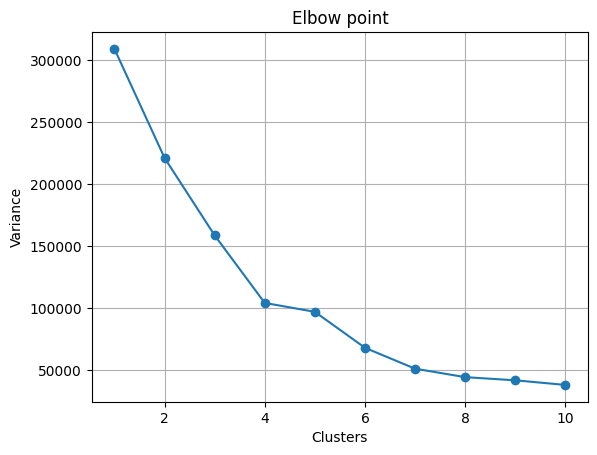

In [154]:
plt.plot(range(1,11),wcss,marker='o')
plt.title('Elbow point')
plt.xlabel("Clusters")
plt.ylabel('Variance')
plt.grid()
plt.show()

# the varience levels out at cluster 7 


In [155]:
# No. of cluster = 7
data=KMeans(n_clusters=7,init='k-means++',random_state=42)
data.fit(x)
y_pred=data.predict(x)
y_pred

array([5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 0, 2, 5, 2,
       5, 2, 0, 6, 6, 6, 0, 6, 6, 0, 0, 0, 0, 0, 6, 0, 0, 6, 0, 0, 0, 6,
       0, 0, 6, 6, 0, 0, 0, 0, 0, 6, 0, 6, 6, 0, 0, 6, 0, 0, 6, 0, 0, 6,
       6, 0, 0, 6, 0, 6, 6, 6, 0, 6, 0, 6, 6, 0, 0, 6, 0, 6, 0, 0, 0, 0,
       0, 6, 6, 6, 6, 6, 0, 0, 0, 0, 6, 6, 6, 4, 6, 4, 6, 4, 3, 4, 3, 4,
       6, 4, 3, 4, 3, 4, 3, 4, 3, 4, 6, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [156]:
x['clusters']=y_pred
x

C:\Users\joeva\AppData\Local\Temp\ipykernel_9304\2744546302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['clusters']=y_pred


,Age,Annual Income (k$),Spending Score (1-100),clusters
0,19,15,39,5
1,21,15,81,2
2,20,16,6,5
3,23,16,77,2
4,31,17,40,5
...,...,...,...,...
195,35,120,79,1
196,45,126,28,3
197,32,126,74,1
198,32,137,18,3


In [157]:
x1=x.iloc[:,:-1].values
y1=x.iloc[:,-1].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=42)


#### Normalization

In [158]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)

### KNN Classifier

In [159]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=11)
KNN.fit(x_train,y_train)
y_pred1=KNN.predict(x_test)
y_pred1

array([6, 2, 5, 3, 3, 6, 6, 3, 3, 2, 0, 3, 4, 6, 3, 4, 0, 3, 0, 6, 6, 5,
       3, 6, 6, 0, 6, 0, 4, 6, 2, 5, 0, 6, 3, 0, 4, 4, 3, 0, 0, 4, 5, 5,
       4, 4, 2, 2, 4, 0, 6, 4, 2, 0, 0, 0, 3, 0, 3, 0], dtype=int32)

In [160]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred1)
cm

array([[14,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  6,  0,  0,  0,  0],
       [ 0,  0,  0, 12,  0,  0,  0],
       [ 0,  0,  0,  0,  7,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  0],
       [ 1,  0,  0,  0,  1,  0, 12]])

In [161]:
y_train

array([4, 6, 2, 5, 2, 0, 5, 1, 0, 3, 6, 4, 3, 2, 0, 6, 5, 4, 6, 6, 5, 6,
       0, 1, 1, 0, 4, 5, 3, 6, 5, 4, 0, 2, 2, 3, 4, 5, 2, 6, 5, 5, 6, 4,
       0, 3, 5, 0, 6, 3, 3, 5, 3, 4, 0, 4, 0, 5, 4, 5, 0, 0, 4, 3, 2, 2,
       3, 4, 6, 2, 3, 6, 6, 3, 2, 3, 2, 6, 0, 4, 3, 3, 4, 6, 0, 5, 2, 0,
       6, 0, 3, 4, 0, 5, 2, 0, 4, 4, 2, 0, 4, 3, 4, 4, 0, 0, 0, 0, 3, 6,
       6, 6, 2, 0, 3, 3, 4, 2, 4, 1, 2, 6, 4, 3, 4, 6, 6, 0, 6, 0, 6, 1,
       5, 3, 0, 0, 5, 0, 4, 0], dtype=int32)

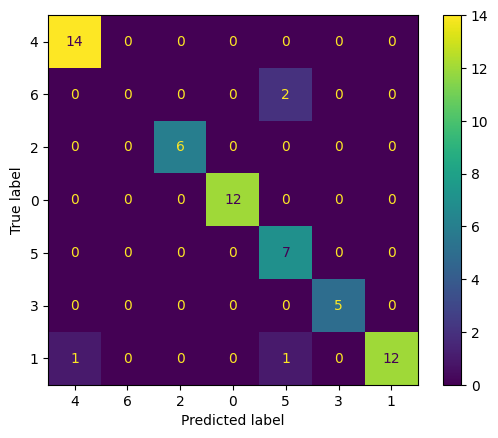

In [162]:
cmd=ConfusionMatrixDisplay(cm,display_labels=['4','6','2','0','5','3','1'])
cmd.plot()

In [163]:
acc=accuracy_score(y_test,y_pred1)
acc

0.9333333333333333

In [164]:
cfr=classification_report(y_test,y_pred1)
print(cfr)

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.00      0.00      0.00         2
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        12
           4       0.70      1.00      0.82         7
           5       1.00      1.00      1.00         5
           6       1.00      0.86      0.92        14

    accuracy                           0.93        60
   macro avg       0.80      0.84      0.82        60
weighted avg       0.92      0.93      0.92        60



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
